<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/PRACTICA_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

s

In [166]:
from keras.datasets import fashion_mnist 

s

In [167]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

s

In [168]:
len(train_data)

60000

s

In [169]:
len(test_data)

10000

s

In [170]:
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


s

In [171]:
train_data = train_data.reshape((60000, 28 * 28))
print(train_data)
print(np.matrix(train_data[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0
    0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   3
    0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216
  172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0
    0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145
  178 159 174 160 123 132 142 172  38   0   0   0   0   0   0   0   0   0
    0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167
  122   0   0   0   0   0   0   0   0   0   0   0 171 135 120 114 118 119
  107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0
    0   0   0   4 171 138 126 120 117 118 102 122 145 111 120 122 

s

In [172]:
train_data = train_data.astype('float32') / 255
train_data[3000]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.00392157,
       0.        , 0.        , 0.47058824, 0.5137255 , 0.35686275,
       0.5764706 , 0.11764706, 0.        , 0.        , 0.00392157,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.01176471, 0.        , 0.        , 0.        , 0.        ,
       0.9843137 , 0.78039217, 0.6745098 , 0.7647059 , 0.59607846,
       0.        , 0.        , 0.        , 0.        , 0.01176471,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16862746, 0.4862745 , 0.75686276, 0.6509804 , 0.9372549 ,
       1.        , 0.84705883, 0.6745098 , 0.89411765, 0.49411

s

In [173]:
test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255

s

In [174]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

s

In [175]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()

#Capa 1
model.add(layers.Dense(10, activation='relu', name="Capa1",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

s

In [176]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


s

In [177]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

s

In [181]:
one_hot_train_labels=train_labels


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

s

In [182]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3839 - accuracy: 0.5379 - val_loss: 0.9832 - val_accuracy: 0.6773
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8687 - accuracy: 0.7059 - val_loss: 0.7827 - val_accuracy: 0.7332
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7371 - accuracy: 0.7475 - val_loss: 0.6984 - val_accuracy: 0.7611
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.7702 - val_loss: 0.6430 - val_accuracy: 0.7820
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6274 - accuracy: 0.7850 - val_loss: 0.6069 - val_accuracy: 0.7936


s

In [183]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6346 - accuracy: 0.7781


s

In [184]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.6345927715301514
test_acc: 0.7781000137329102


s

In [185]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

s

313/313 [==============================] - 0s 1ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[9.3113493e-07 1.2273666e-05 1.1578679e-05 3.2449218e-05 2.6946511e-05
 1.8039426e-01 3.1908519e-06 2.7631122e-01 2.8317587e-02 5.1488954e-01]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[756   9  11  89  11   2 106   0  16   0]
 [  6 922  18  44   4   0   3   0   3   0]
 [ 11   1 620   9 214   1 135   0   9   0]
 [ 38  13   5 829  52   1  56   0   6   0]
 [  0   2 154  47 706   0  83   0   8   0]
 [  1   1   0   0   0 820   0 100   9  69]
 [180   3 170  54 158   1 401   0  33   0]
 [  0   0   0   0   0  37   0 876   0  87]
 [  0   1  13  14   3   9  32   7 919   2]
 [  0   0   0   0  

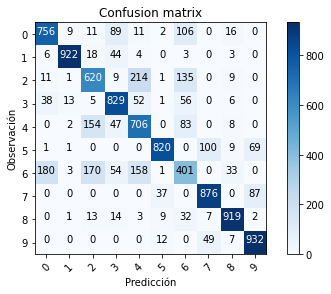

In [186]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

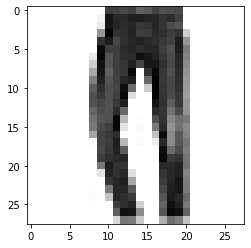

In [187]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

s

In [188]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[1.9838002e-02 9.5685506e-01 2.3197047e-03 1.8343328e-02 8.8916882e-04
 2.4332378e-05 1.6581045e-03 7.3692750e-06 6.3653053e-05 1.2578688e-06]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[9.3113493e-07 1.2273666e-05 1.1578679e-05 ... 2.7631122e-01
  2.8317587e-02 5.1488954e-01]
 [2.6371591e-03 3.2763214e-06 7.4425507e-01 ... 3.0843079e-09
  1.0684723e-03 6.8638033e-09]


s

In [189]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

s

313/313 [==============================] - 0s 1ms/step


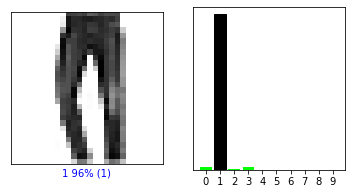

<Figure size 432x288 with 0 Axes>

In [190]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

s

In [203]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers


model = models.Sequential()

#Capa 2
model.add(layers.Dense(10, activation='relu', name="Capa2",input_shape=(28*28,)))

#Capa final
model.add(layers.Dense(10, name="CapaSalida",activation='softmax'))

s

In [204]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [205]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

s

In [206]:
one_hot_train_labels=train_labels

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

s

In [207]:
history = model.fit(train_data,
          train_labels,
          epochs=5,
          batch_size=128)

Epoch 1/5


ValueError: ignored

In [195]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

ValueError: ignored

In [196]:
# Look at confusion matrix 
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [197]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_data)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

313/313 [==============================] - 0s 1ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.14526549 0.07800703 0.06267726 0.08427159 0.18540604 0.05978778
 0.11297855 0.08146738 0.04501997 0.14511874]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[4 9 4 ... 4 4 4]


AxisError: ignored

In [ ]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_data[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

from keras.utils.np_utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = model.predict(test_data)

print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28 * 28))
test_data = test_data.reshape((10000, 28 * 28))

train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

predictions = model.predict(test_data)

for i in range(6):
  if (i==5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_data.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()